# Name - Ananya Garg

## The Sparks Foundation : Data Science & Business Analytics Intern


### [GRIPJAN21] Task 1: Prediction using Supervised Machine Learning

#### In this regression task we will predict the percentage of marks that a student is expected to      score based upon the the number of hours they studied.
#### To Calculate: What will be predicted score if a student studies for 9.25 hrs/ day?

In [3]:
# Importing the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#Loading the data

S_data = pd.read_csv('http://bit.ly/w-data')
S_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
S_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
S_data.shape

(25, 2)

In [8]:
S_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization of data for better understanding of correlation between variables

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

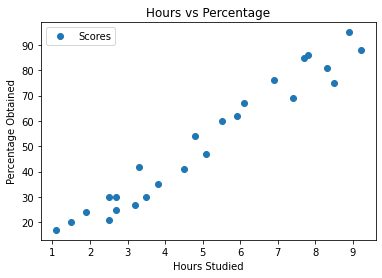

In [10]:
# Plotting the distribution of scores

S_data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data
#### Dividing independent and dependent variables

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
x=S_data.iloc[:,:-1].values
y=S_data.iloc[:,1].values

### Splitting data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Training the algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [14]:
from sklearn.linear_model import LinearRegression
l_r = LinearRegression()

#fitting our  model using lr

l_r.fit(x_train,y_train)  

LinearRegression()

### Plotting the Regression

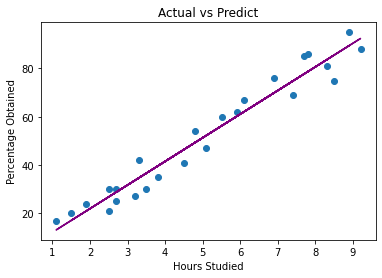

In [16]:
#Plotting the training data

line = l_r.coef_*x+l_r.intercept_

plt.scatter(x, y)
plt.plot(x, line,color='purple')
plt.title('Actual vs Predict')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()

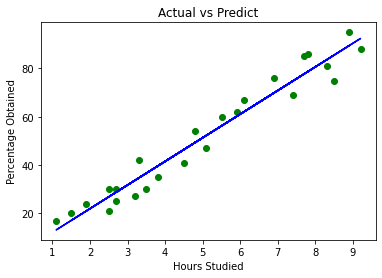

In [17]:
#plotting the test data

line= l_r.coef_*x+l_r.intercept_

plt.scatter(x,y, color='green')
plt.plot(x, line,color='blue')
plt.title('Actual vs Predict')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()

### Predicting the response on our test data

In [18]:
y_pred = l_r.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

### Comparing Actual vs Predicted

In [20]:
df = pd.DataFrame({'Actual' : y_test , 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Testing with our own data

In [23]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = l_r.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


### Evaluation of the model using the most common performance metrics

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [28]:
from sklearn import metrics

print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Square Error: 4.792191274636315
